In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys

# Get the absolute path of the current notebook
sys.path.append('../model_generator')
sys.path.append('../ebm')

from model_generator.model_factory import ModelFactory

(10, 10)


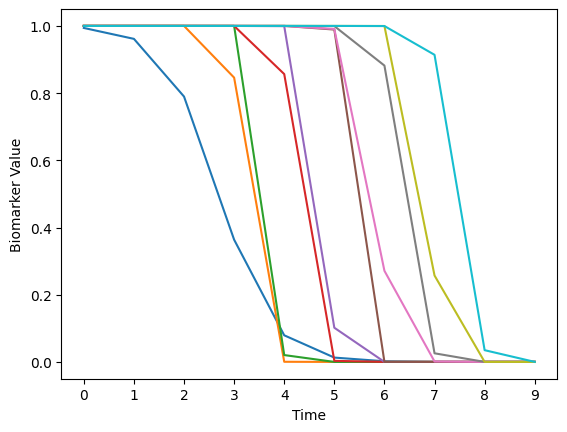

In [2]:
# Example parameters for the sigmoid model
biomarker_params = {
    0: {'s': 0.1, 'c': 1.0},
    1: {'s': 0.5, 'c': 10.0},
    2: {'s': 0.7, 'c': 20.0},
    3: {'s': 0.4, 'c': 30.0},
    4: {'s': 0.5, 'c': 40.0},
    5: {'s': 0.8, 'c': 50.0},
    6: {'s': 0.3, 'c': 60.0},
    7: {'s': 0.3, 'c': 70.0},
    8: {'s': 0.5, 'c': 80.0},
    9: {'s': 0.3, 'c': 90.0}
}

params = {
    'n_stages': 10,
    'biomarker_params': biomarker_params,
    'start_time': -50,
    'end_time': 80,
    'steps': 1000,
    'flip_v': True,
    'flip_h': False,
    'convergence_threshold': 1e-4
}

model = ModelFactory.create_model('sigmoid', **params)
model.fit()
output = model.transform(X=None) # only works when X is explicity defined?

print(output.shape)

for i, biomarker in enumerate(output):
    plt.plot(biomarker, label=f'Biomarker {i}')
plt.xlabel("Stages")
plt.ylabel("Biomarker Value")
plt.xticks(np.arange(10))
plt.show()


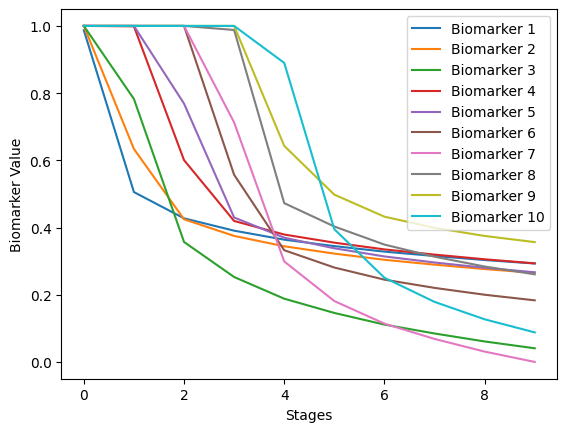

In [8]:
from model_generator.model_factory import ModelFactory

params = {
    'n_stages': 10,
    'l1_mean': 3.0,
    'l2_mean': 3.0,
    'gamma_mean': 0.6,
    'eta_mean': 0.9,
    'k_ij_value': 0.5,
    'random_state': 10,
    'start_time': 0,
    'end_time': 100,
    'steps': 100,
    'matrix_type': 'Tridiagonal',
    'convergence_threshold': 1e-4,
    'flip_v': True
}

model = ModelFactory.create_model('acp', **params)
model.fit()
output = model.transform(X = None)

#TODO: consider fit_transform instead?

for i, biomarker in enumerate(output):
    plt.plot(biomarker, label=f'Biomarker {i+1}')
plt.xlabel("Stages")
plt.ylabel("Biomarker Value")
plt.legend()
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'matrix_type': ['Random Zero Diagonal', 'Binary Zero Diagonal', 'Tridiagonal'],
    'l1_mean': [1.0, 3.0, 5.0],
    'l2_mean': [1.0, 3.0, 5.0],
    'gamma_mean': [0.1, 0.6, 1.0],
    'eta_mean': [0.3, 0.9, 1.5],
    'k_ij_value': [0.1, 0.5, 0.9],
}

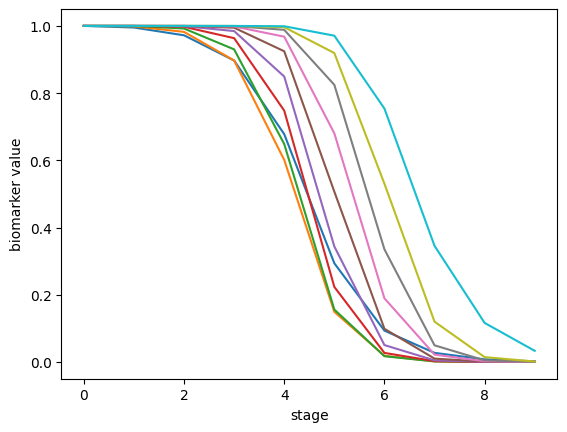

In [14]:
# Define parameters for the Logistic ODE model
params = {
    'n_stages': 10,  # Number of biomarkers
    'step': 0.1,
    'n_steps': 100,
    'start_time': 0,
    'end_time': 100,
    'steps': 100,
    'connectivity_matrix_type': 'random_connectivity',  # Connectivity matrix type
    'convergence_threshold': 1e-4,
    'flip_v': True
}


model = ModelFactory.create_model('logistic', **params)
model.fit()
output = model.transform(X = None)

import matplotlib.pyplot as plt

for i, biomarker in enumerate(output):
    plt.plot(biomarker, label=f'Biomarker {i+1}')
plt.xlabel("stage")
plt.ylabel("biomarker value")
plt.show()


In [16]:
params = {
    'n_stages': 10,
    'coeff': 0.5, 
    'start_time': 0,
    'end_time': 100,
    'steps': 100,
    'convergence_threshold': 1e-4
}

model = ModelFactory.create_model('transition', **params)
model.fit()
output = model.transform(X=None)

for i, biomarker in enumerate(output):
    plt.plot(biomarker, label=f'Biomarker {i+1}')
plt.xlabel("stages")
plt.ylabel("biomarker value")
plt.show()


ValueError: Unknown model type: transition